In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Get a list of column names and types

columns_1 = inspector.get_columns('measurement')
for c in columns_1:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
date - TEXT
prcp - FLOAT
tobs - FLOAT


In [8]:
columns_2 = inspector.get_columns('station')
for c in columns_2:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
name - TEXT
latitude - FLOAT
longitude - FLOAT
elevation - FLOAT


In [15]:
# Start date = 3/26/2021
# End date = 4/4/2021

In [9]:
# reflect an existing database into a new model

# Declare a Base() using automap_base()
Base=automap_base()

In [10]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
# check out database
measurements = session.query(Measurement)
for each_measurement in measurements:
    print(each_measurement.id)
    break

1


In [15]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa70f692b50>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [16]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa710bf7670>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [17]:
results=session.query(Measurement)

In [18]:
# dates = results.filter(Measurement.date)
for each_result in results.limit(15):
    print(each_result.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17


In [19]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# session.query(Measurement).filter(func.strftime()) >='2020-02-01')\
#     .filter(Measurement.date <='2020-02-01')


# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Last data point is {last_date}')

year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", year_ago)

Last data point is ('2017-08-23',)
Query Date:  2016-08-23


In [21]:
# Perform a query to retrieve the data and precipitation scores
year_prcp=session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(year_prcp).set_index('date')
prcp_df.count()

prcp    2021
dtype: int64

In [22]:
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [23]:
# Sort the dataframe by date
date_df=prcp_df.sort_values(by='date')
date_df.count()
clean_df=date_df.dropna(how='any')

In [24]:
clean_df.count()

prcp    2021
dtype: int64

In [25]:
date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
clean_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
date_df.columns

Index(['prcp'], dtype='object')

In [28]:
x_ticks= ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18',
         '2017-05-31', '2017-07-10']

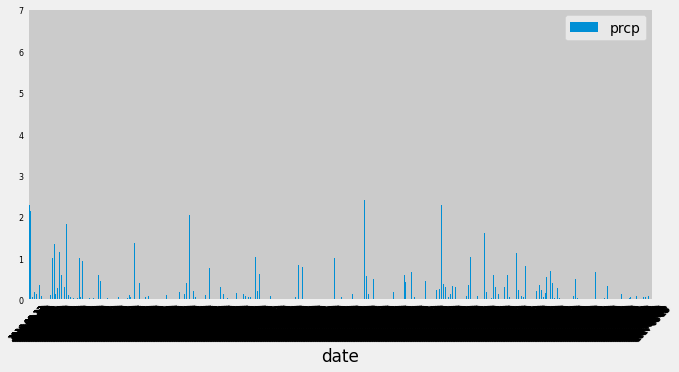

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(kind='bar', figsize = (10, 5), fontsize=8, rot=45)
# plt.set_xticks(minor=False)
# ax.grid('on', which)
# ax.set_xticks()
plt.grid(True)
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
columns_2 = inspector.get_columns('station')
for c in columns_2:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
name - TEXT
latitude - FLOAT
longitude - FLOAT
elevation - FLOAT


In [78]:
# Design a query to show how many stations are available in this dataset?
unique_stations=session.query(Station.station).distinct().count()
unique_stations

9

In [79]:
results_station=session.query(Station.id, Station.name, Station.station)
for each_result in results_station:
    print(each_result)

(1, 'WAIKIKI 717.2, HI US', 'USC00519397')
(2, 'KANEOHE 838.1, HI US', 'USC00513117')
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
(4, 'PEARL CITY, HI US', 'USC00517948')
(5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838')
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
(7, 'WAIHEE 837.5, HI US', 'USC00519281')
(8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
(9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [82]:
session.query(func.count(Measurement.station)).all()

[(19550)]

In [91]:
station_list=session.query(Station.station).distinct().all()

In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
# # List the stations and the counts in descending order.

active_stations=session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

19550

In [92]:
# Count number of measurement rows where station = each_station in unique_stations

for each_station in station_list:
    print(each_station)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [ ]:
# iterate through the list 

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
